In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [194]:
df = pd.read_csv("data/04022021.csv")
df.head()

,Unnamed: 0,config/num_nodes,config/edge_density,config/discrete_node_ratio,config/discrete_signal_to_noise_ratio,config/min_discrete_value_classes,config/max_discrete_value_classes,config/continuous_noise_std,config/continuous_beta_mean,config/continuous_beta_std,...,gd_compare/error_types/false_negatives/rate,gd_compare/error_types/false_negatives/edges,gd_compare/error_types/true_positives/rate,gd_compare/error_types/true_positives/edges,experiment_config/algorithm/valid_parameters/discrete_limit/type,experiment_config/algorithm/valid_parameters/discrete_limit/minimum,experiment_config/algorithm/valid_parameters/discrete_limit/default,experiment_config/algorithm/valid_parameters/cores/required,experiment_config/parameters/discrete_limit,result/meta_results/discrete_limit
0,0,20,0.05,0.0,0.9,2,4,1.0,5.0,3.0,...,0.250000,"[[797, 798], [800, 805], [807, 808]]",0.750000,"[[793, 810], [800, 801], [796, 804], [804, 805...",NaN,NaN,NaN,NaN,NaN,NaN
1,1,20,0.05,0.0,0.9,2,4,1.0,5.0,3.0,...,0.083333,"[[800, 805]]",0.916667,"[[793, 810], [800, 801], [796, 804], [797, 798...",NaN,NaN,NaN,NaN,NaN,NaN
2,2,20,0.05,0.0,0.9,2,4,1.0,5.0,3.0,...,0.250000,"[[817, 818], [820, 825], [820, 822]]",0.750000,"[[820, 821], [829, 830], [822, 830], [824, 825...",NaN,NaN,NaN,NaN,NaN,NaN
3,3,20,0.05,0.0,0.9,2,4,1.0,5.0,3.0,...,0.250000,"[[817, 818], [820, 825], [820, 822]]",0.750000,"[[820, 821], [829, 830], [822, 830], [824, 825...",NaN,NaN,NaN,NaN,NaN,NaN
4,4,20,0.05,0.0,0.9,2,4,1.0,5.0,3.0,...,0.166667,"[[849, 850], [837, 838]]",0.833333,"[[843, 844], [840, 845], [838, 839], [844, 845...",NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
dataset_config = [c for c in df.columns if c.startswith("config")]
gd_compare = [c for c in df.columns if c.startswith("gd_compare") and not c.endswith("edges")]
result = ['result/dataset_loading_time', 'result/execution_time']
experiment_config = ["experiment_config/parameters/alpha", "experiment_config/algorithm/function", "experiment_config/algorithm/package", "experiment_config/name"]

In [196]:
# Selecting relevant columns
columns = dataset_config + gd_compare + experiment_config + result

In [221]:
#Renaming columns
renaming_dict = {}
for c in columns:
    name_split = c.split("/")
    name = name_split[-1]
    
    if name == "rate":
        name = name_split[-2]
        
    renaming_dict[c] = name

cleaned_df = df[columns].rename(columns=renaming_dict)
cleaned_df.columns

Index(['num_nodes', 'edge_density', 'discrete_node_ratio',
       'discrete_signal_to_noise_ratio', 'min_discrete_value_classes',
       'max_discrete_value_classes', 'continuous_noise_std',
       'continuous_beta_mean', 'continuous_beta_std', 'num_samples', 'cores',
       'node', 'graph_edit_distance', 'mean_jaccard_coefficient',
       'false_positives', 'true_negatives', 'false_negatives',
       'true_positives', 'alpha', 'function', 'package', 'name',
       'dataset_loading_time', 'execution_time'],
      dtype='object')

In [198]:
continous_data = cleaned_df[cleaned_df.discrete_node_ratio == 0]
mix_data = cleaned_df[cleaned_df.discrete_node_ratio > 0][cleaned_df.discrete_node_ratio < 1]
discrete_data = cleaned_df[cleaned_df.discrete_node_ratio == 1]

<ipython-input-198-4a95f828dd7a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mix_data = cleaned_df[cleaned_df.discrete_node_ratio > 0][cleaned_df.discrete_node_ratio < 1]


In [200]:
sns.set_theme(style="whitegrid")

def scatterplot(data, x: str, y: str, hue: str, size: str = None):
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.despine(f, left=True, bottom=True)
    return sns.scatterplot(
        x=x,
        y=y,
        hue=hue,
        size=size,
        palette="ch:r=-.2,d=.3_r",
        #hue_order=filled,
        sizes=(1, 8), linewidth=0,
        data=data, ax=ax
    )

<AxesSubplot:xlabel='true_positives', ylabel='true_negatives'>

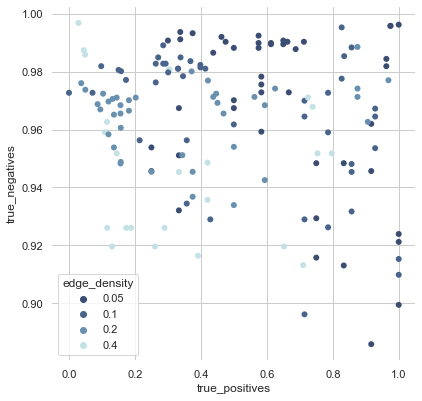

In [201]:
scatterplot(cleaned_df, "true_positives", "true_negatives", "edge_density")

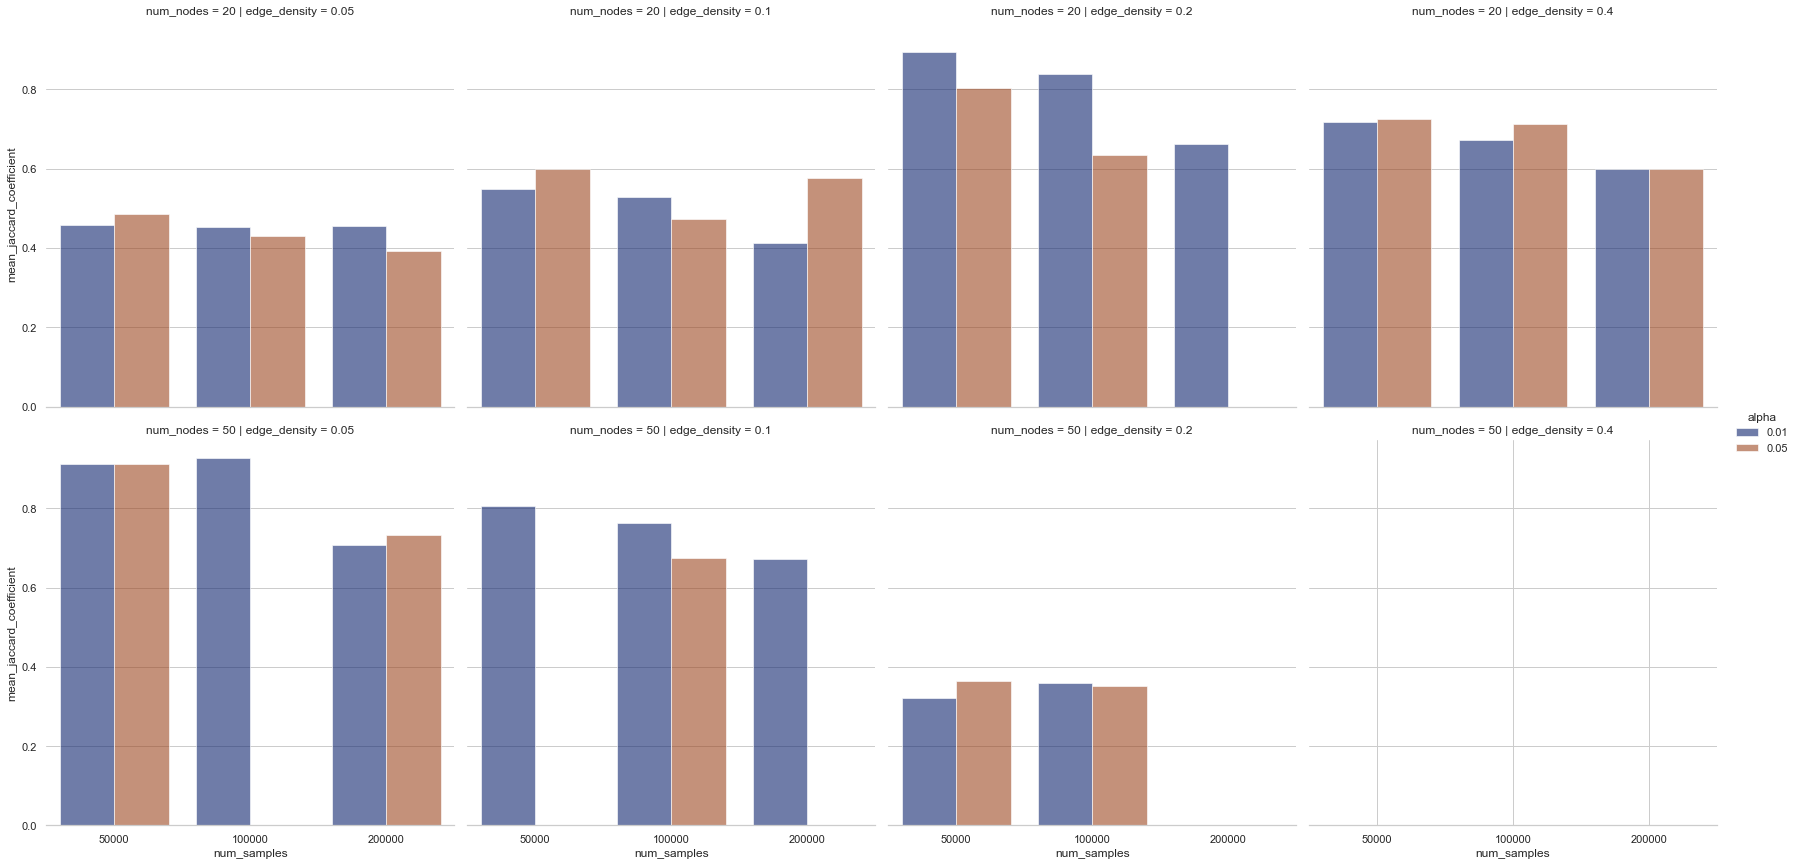

In [225]:
["num_nodes", "edge_density", "num_samples", "alpha", "discrete_node_ratio"]

plotted_data = cleaned_df
g = sns.catplot(
    data=discrete_data,
    kind="bar",
    x="num_samples",
    y="mean_jaccard_coefficient",
    hue="alpha",
    row="num_nodes",
    col="edge_density",
    palette="dark",
    alpha=.6,
    height=6,
    facet_kws=dict(margin_titles=True),
)
g.despine(left=True)

In [171]:
cleaned_df.corr()
structure hemming distance?

,num_nodes,edge_density,discrete_node_ratio,discrete_signal_to_noise_ratio,min_discrete_value_classes,max_discrete_value_classes,continuous_noise_std,continuous_beta_mean,continuous_beta_std,num_samples,...,graph_edit_distance,mean_jaccard_coefficient,false_positives,true_negatives,false_negatives,true_positives,alpha,dataset_loading_time,execution_time,dataset_loading_time
num_nodes,1.000000e+00,-2.100583e-01,-9.515214e-02,-6.138598e-16,NaN,NaN,NaN,NaN,NaN,-1.664389e-02,...,6.157841e-01,-1.550707e-01,-6.326942e-01,6.326942e-01,2.959262e-01,-2.959262e-01,-4.472443e-02,3.006443e-01,3.017662e-01,3.006443e-01
edge_density,-2.100583e-01,1.000000e+00,-5.155780e-02,1.986769e-15,NaN,NaN,NaN,NaN,NaN,-3.204355e-02,...,3.320576e-01,-3.075765e-01,2.473069e-01,-2.473069e-01,3.622185e-01,-3.622185e-01,7.785354e-03,2.471214e-01,8.930835e-02,2.471214e-01
discrete_node_ratio,-9.515214e-02,-5.155780e-02,1.000000e+00,-1.182793e-16,NaN,NaN,NaN,NaN,NaN,1.376598e-02,...,-2.642191e-01,4.044199e-01,-3.349005e-02,3.349005e-02,-3.924738e-01,3.924738e-01,-4.726722e-02,-2.684651e-01,1.770802e-01,-2.684651e-01
discrete_signal_to_noise_ratio,-6.138598e-16,1.986769e-15,-1.182793e-16,1.000000e+00,NaN,NaN,NaN,NaN,NaN,1.287347e-16,...,-7.527858e-16,-1.538157e-16,1.004097e-15,1.591918e-14,-3.501451e-16,-3.259971e-16,-5.070072e-15,-1.004232e-16,1.734066e-16,-1.004232e-16
min_discrete_value_classes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_discrete_value_classes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continuous_noise_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continuous_beta_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continuous_beta_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_samples,-1.664389e-02,-3.204355e-02,1.376598e-02,1.287347e-16,NaN,NaN,NaN,NaN,NaN,1.000000e+00,...,3.115525e-03,-1.770243e-01,2.749303e-01,-2.749303e-01,1.518927e-01,-1.518927e-01,1.936838e-02,6.862189e-02,6.535399e-02,6.862189e-02


In [183]:
import seaborn as sns

sns.catplot(
    cleaned_df,
    x="num_samples",
    col="edge_density",
    row="alpha",
    hue="num_nodes",
    height=3,
    facet_kws=dict(margin_titles=True),
)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
["num_nodes", "edge_density", "num_samples", "alpha", "discrete_node_ratio"]

In [218]:
cleaned_df[cleaned_df.num_nodes == 20]

{'alpha',
 'continuous_beta_mean',
 'continuous_beta_std',
 'continuous_noise_std',
 'cores',
 'dataset_loading_time',
 'discrete_node_ratio',
 'discrete_signal_to_noise_ratio',
 'edge_density',
 'execution_time',
 'false_negatives',
 'false_positives',
 'function',
 'graph_edit_distance',
 'max_discrete_value_classes',
 'mean_jaccard_coefficient',
 'min_discrete_value_classes',
 'name',
 'node',
 'num_nodes',
 'num_samples',
 'package',
 'true_negatives',
 'true_positives'}